In [1]:
import numpy as np
import bispy as bsp
import quaternion as qt
import scipy

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sonata_base import *
from sonata_slra import *
from sonata_ellipse import *
from sonata_visuals import *

%reload_ext autoreload
%autoreload 2

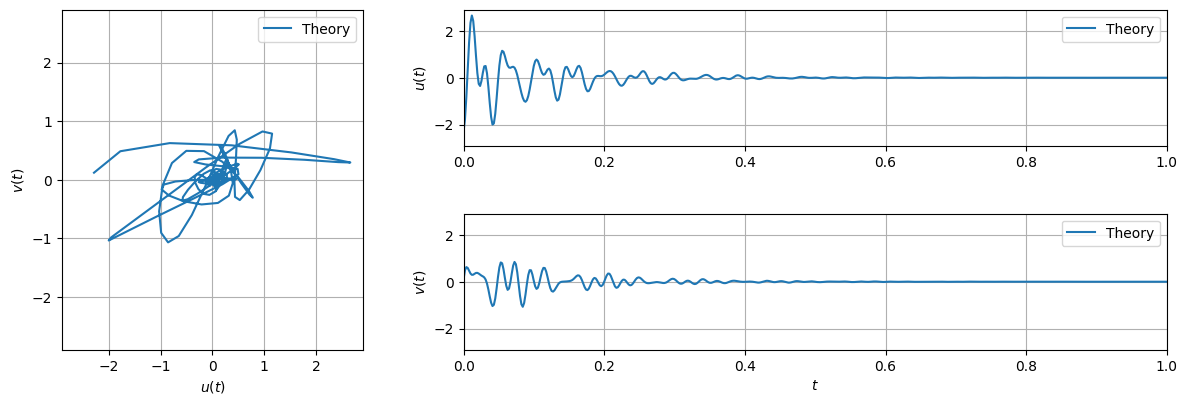

In [2]:
N = 512 # Number of samples
t = np.linspace(0,1,N) # time stamps
R = 3

y, M, q = generate_ellipse_mixture(N,R)
plot_theoretical_signal(t,y)

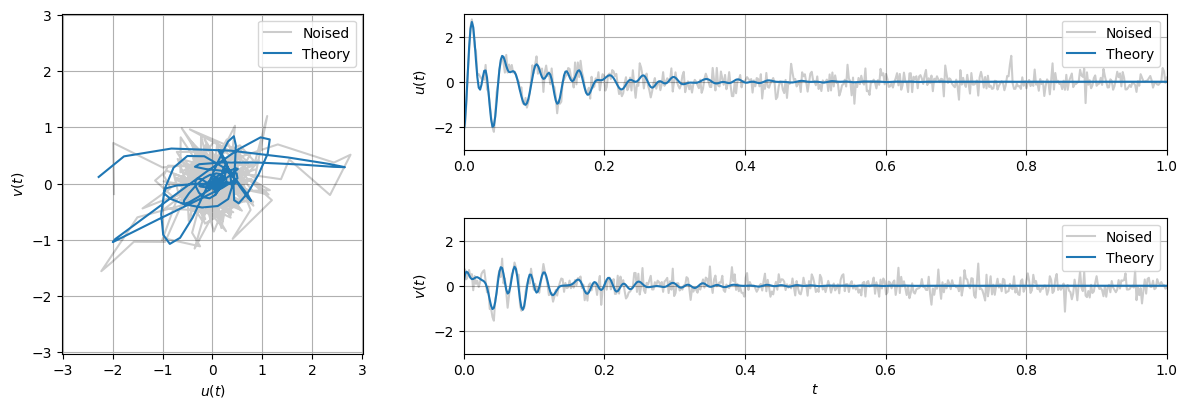

In [3]:
snr = 1

y_noised, b = add_quaternion_white_noise(y,snr)

plot_noisy_signal(t,y,b, method_limits='noise')

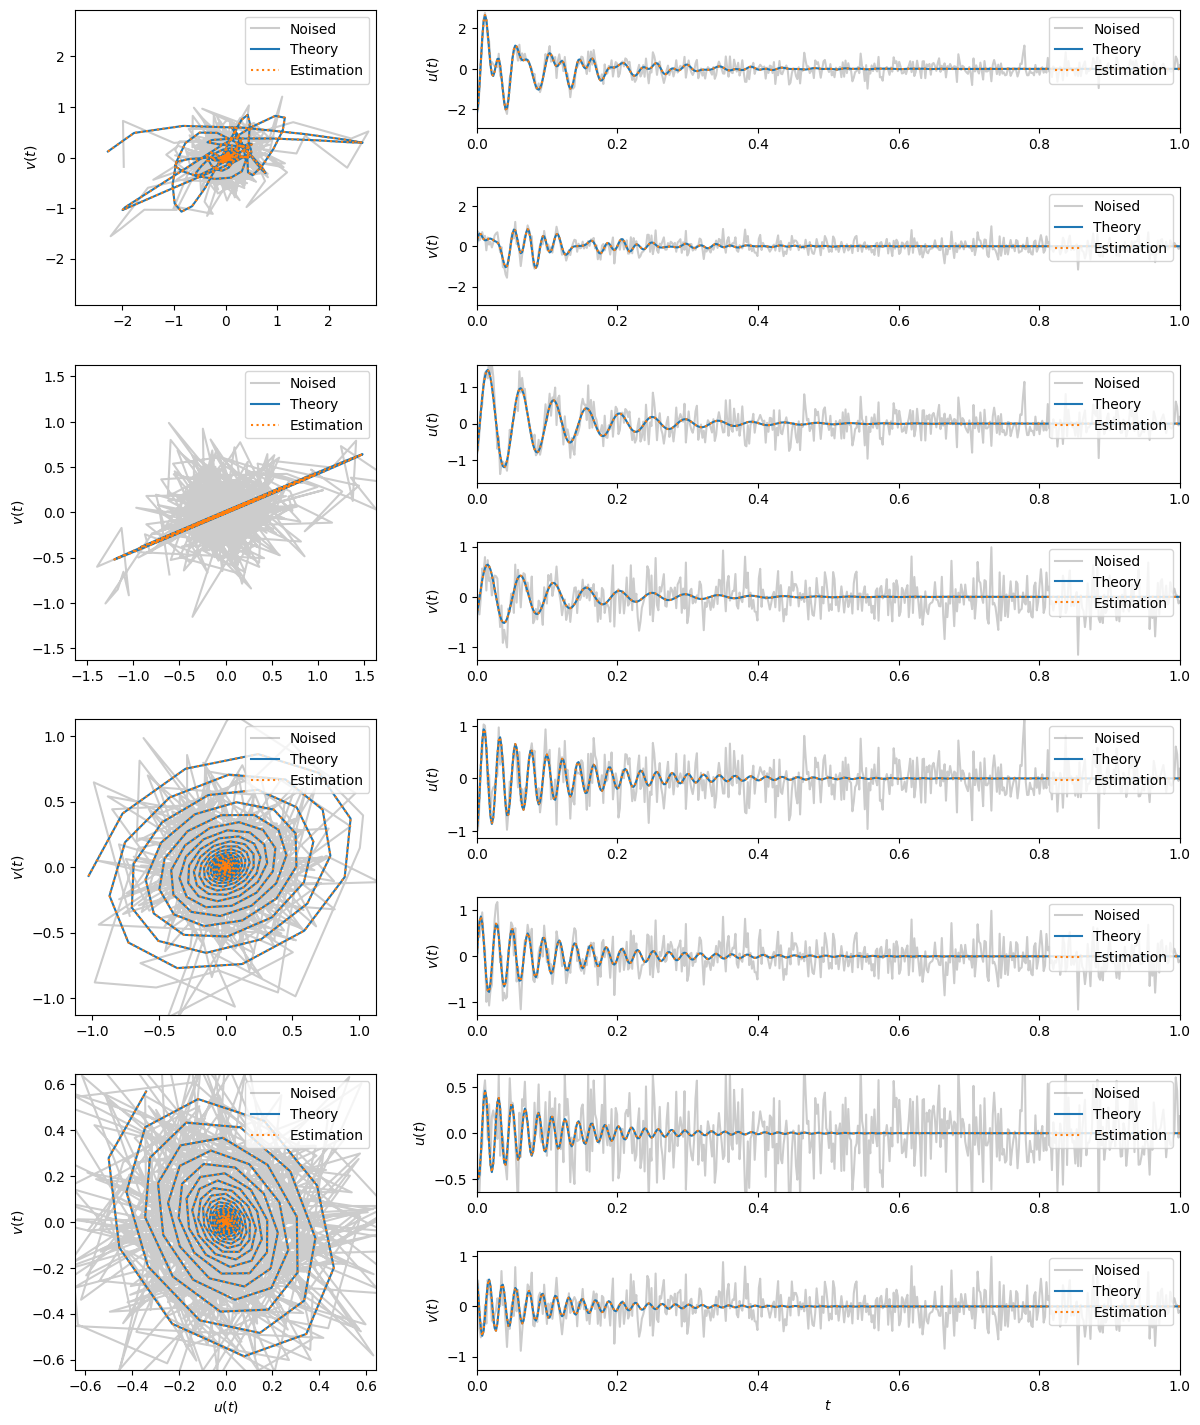

In [ ]:
M_hat, q_hat, flag_outer = sonata(y,R,number_inner_iterations=5, L = 128, number_outer_iterations=50)

plot_estimated_ellipses(t,M,M_hat,q,q_hat,y_noised,method_limits='theory')